# Classification Techniques

### Training Set

In [341]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#FAzer a média das 3 medições
data = data.groupby('id').mean().reset_index()

print(data.shape)



(252, 755)


In [342]:
import numpy as np

def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    x = np.arange(len(xvalues))  # the label locations
    ax.set_xticks(x)
    ax.set_xticklabels(xvalues, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    width = 0.8  # the width of the bars
    step = width / len(yvalues)
    k = 0
    for name, y in yvalues.items():
        ax.bar(x + k * step, y, step, label=name)
        k += 1
    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    

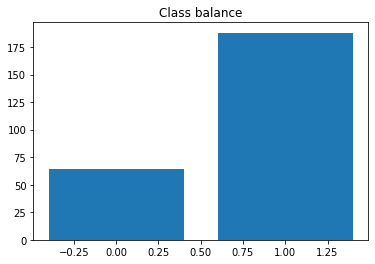

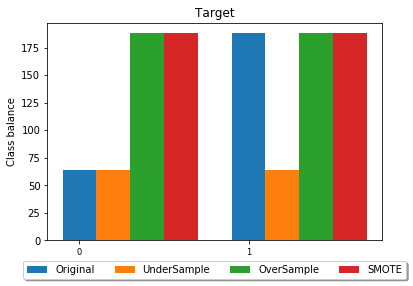

(252, 754)
(376, 755)


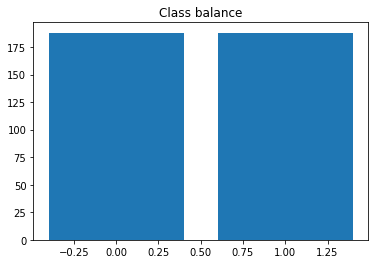

In [343]:
#Should have normalization and balancing...

#Balancing

unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()

print(data.shape)
print(df_SMOTE.shape)
data = df_SMOTE

#Drop lable

X = data.drop(columns=['class'])
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)


#Use SMOTE?
target_count = data['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)


In [344]:
#Normalization

from sklearn.preprocessing import Normalizer

try:
    imp_nr = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
    imp_sb = SimpleImputer(strategy='most_frequent', missing_values='', copy=True)
    df_nr = pd.DataFrame(imp_nr.fit_transform(cols_nr), columns=cols_nr.columns)
    df_sb = pd.DataFrame(imp_sb.fit_transform(cols_sb), columns=cols_sb.columns)

    data = df_nr.join(df_sb, how='right')
    data.describe(include='all')

    transf = Normalizer().fit(df_nr)
    df_nr = pd.DataFrame(transf.transform(df_nr, copy=True), columns= df_nr.columns)
    norm_data = df_nr.join(df_sb, how='right')
    norm_data.describe(include='all')
except:
    print("No missing values") 

transf = Normalizer().fit(data)
norm_data = pd.DataFrame(transf.transform(data, copy=True), columns= data.columns)
norm_data.describe(include='all')

data = norm_data
#Sensitivity specificity
data.describe(include='all')

No missing values


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,...,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02
mean,1.653319e-08,8.477119e-11,9.516414e-11,8.902620e-11,6.556376e-11,3.705837e-08,3.688577e-08,9.116101e-13,5.063939e-14,3.244777e-13,...,3.209309e-09,2.568993e-09,2.371250e-09,1.809100e-09,1.523266e-09,1.449318e-09,1.782387e-09,1.769361e-09,3.530157e-09,7.177949e-11
std,1.594755e-08,1.123287e-10,6.833340e-11,6.470289e-11,6.172882e-11,1.660065e-08,1.645707e-08,9.211847e-13,1.272856e-13,6.779383e-13,...,4.162920e-09,3.216779e-09,3.430389e-09,2.982546e-09,2.680659e-09,2.428885e-09,2.693505e-09,2.448045e-09,5.365558e-09,9.237723e-11
min,0.000000e+00,0.000000e+00,1.458697e-12,8.874396e-12,5.742804e-12,1.085544e-08,1.076185e-08,2.970239e-14,5.200020e-16,7.973363e-15,...,8.284029e-11,1.009807e-10,6.885815e-11,7.299686e-11,7.110653e-11,1.010537e-10,9.151688e-11,6.031149e-11,1.353010e-10,0.000000e+00
25%,6.661255e-09,0.000000e+00,5.018842e-11,4.513042e-11,2.512770e-11,2.737579e-08,2.729881e-08,3.069704e-13,3.875266e-15,5.544837e-14,...,4.645978e-10,5.540892e-10,4.419646e-10,3.204611e-10,3.041381e-10,3.215404e-10,4.199526e-10,3.897575e-10,3.977046e-10,0.000000e+00
50%,1.196676e-08,0.000000e+00,7.844336e-11,7.052513e-11,4.769453e-11,3.397451e-08,3.387582e-08,6.048891e-13,8.291791e-15,1.387313e-13,...,1.121356e-09,1.253294e-09,1.009251e-09,7.518171e-10,5.546869e-10,5.462161e-10,8.115261e-10,8.457357e-10,1.016807e-09,1.570868e-11
75%,2.133745e-08,1.440480e-10,1.135314e-10,1.047024e-10,7.942739e-11,4.194806e-08,4.180887e-08,1.128953e-12,2.542011e-14,3.131542e-13,...,4.450826e-09,3.307969e-09,2.603189e-09,1.821030e-09,1.441194e-09,1.363687e-09,2.015659e-09,2.067914e-09,4.499236e-09,1.192031e-10
max,1.207492e-07,5.020282e-10,5.008460e-10,4.364723e-10,4.225563e-10,1.857504e-07,1.837423e-07,5.414189e-12,1.230897e-12,8.368565e-12,...,2.222073e-08,2.091984e-08,2.407462e-08,2.248159e-08,1.882247e-08,1.683825e-08,1.683374e-08,1.541456e-08,3.276195e-08,5.977681e-10


### KNN

Accuracy score: 0.7168141592920354 

Confusion matrix, without normalization
[[43 13]
 [19 38]]


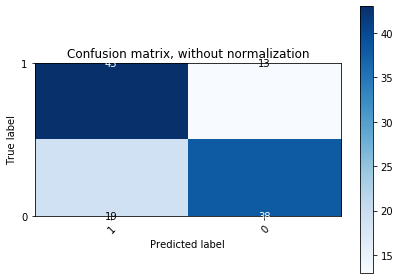

In [345]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
#knn.score(X_test, y_test)   
y_predict = knn.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")

labels = pd.unique(y)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_predict, classes=labels, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

### Naive Bayes

Accuracy score: 0.6283185840707964 

Confusion matrix, without normalization
[[23 33]
 [ 9 48]]


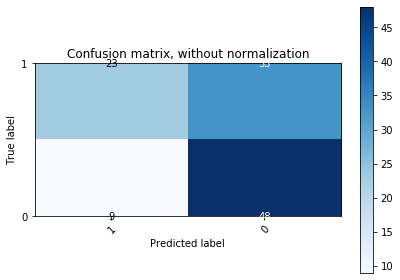

In [346]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)
y_predict = gaussNB.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

Accuracy score: 0.7610619469026548 

Confusion matrix, without normalization
[[47  9]
 [18 39]]


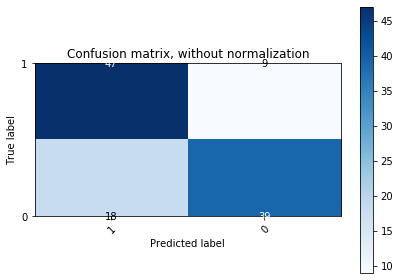

In [347]:
bernNB = BernoulliNB(binarize = True)
bernNB.fit(X_train, y_train)
y_predict = bernNB.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_predict), "\n")

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_predict, classes=labels,
                      title='Confusion matrix, without normalization')

In [348]:
# Can only be used with non-negative values
#multiNB = MultinomialNB()
#multiNB.fit(X_train, y_train)
#y_predict = multiNB.predict(X_test)
#accuracy_score(y_test, y_predict)

In [349]:
## SHow diferent results using balancings
## Show impact of usage of diferent features in KNN and NB